#Regression

Definisi : Regresi adalah metode statistik yang digunakan untuk memodelkan dan menganalisis hubungan antar variabel dependen (prediktor) dan variabel dependen (target). <br>
Tujuan : untuk memprediksi atau memperkirakan nilai variabel dependen berdasarkan nilai nilai variabel independen

#Generete syntetic data

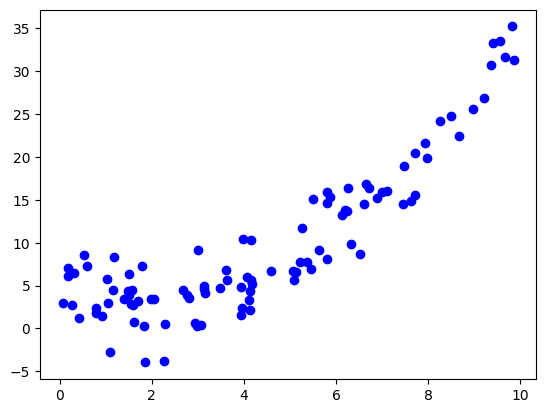

In [49]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.rand(100, 1) * 10 # Variabel independen 100 nilai random
#y = 3.5 * x + x + np.random.rand(100, 1) * 3
y =0.5 * x**2 -2 * x + 5+ np.random.randn(100, 1) * 3
plt.scatter (x, y, color='blue')
plt.show()

# Train test split

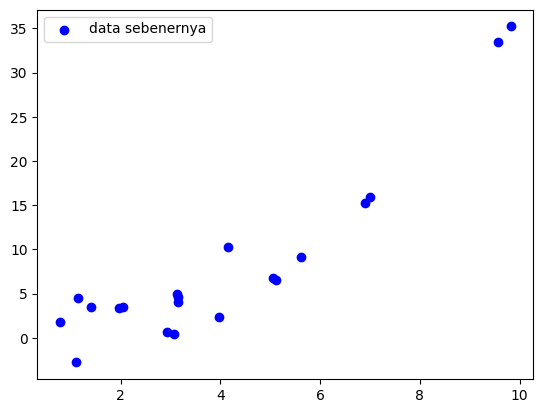

In [50]:
from sklearn.model_selection import train_test_split

#buat data training 80% dan data test 20% dari total data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=1)

#plot data test
plt.scatter(x_test, y_test, color ='blue', label = 'data sebenernya')
plt.legend()
plt.show()

# Linear *Regression*

Definisi : Merupakan model regresi yang tujuannya untuk mencari hubungan linear antara variabel independen dan dependen

$$
  \hat{y} = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_n X_n
$$


hasil MSE = 22.805005366459557


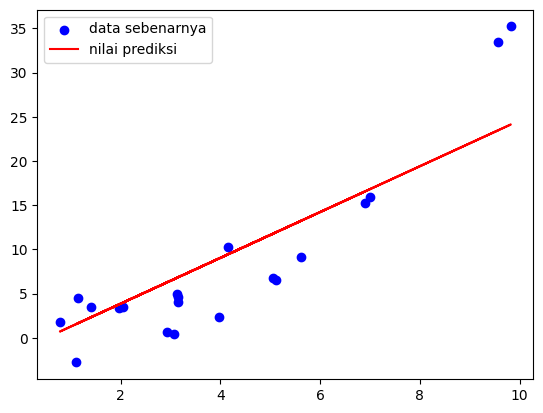

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error #semakin kecil (mendekati 0) MSE, semakin bagus

Linear_model = LinearRegression()
#training
Linear_model.fit(x_train,y_train)

#testing
y_pred = Linear_model.predict(x_test)
mse = mean_squared_error(y_pred,y_test) #hasil prediksi dan data asli
print(f"hasil MSE = {mse}")

plt.scatter(x_test, y_test, color='blue', label='data sebenarnya')
plt.plot(x_test, y_pred, color='red', label='nilai prediksi')
plt.legend()
plt.show()

# Ridge Regression

Definisi : salah satu bagian dari linear regression dengan menambahkan Penalati L2 regularization, agar dapat membantu mengurai overfitting

$$
  L(\beta) = \sum_{i=1}^{m} (y_i - \hat{y_i})^2 + \Lambda \sum_{j=1}^{n} \beta_j^2
$$




Loss function = jumlah kesalahan kuadrat + lambda * penalti {L1 regularization}

hasil MSE = 22.809965145046224


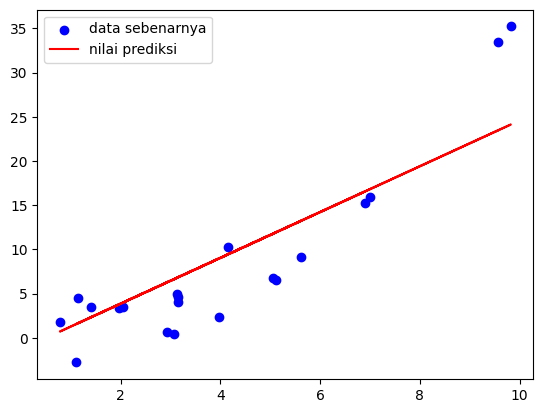

In [52]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error #semakin kecil (mendekati 0) MSE, semakin bagus

ridge_model = Ridge(alpha=0.1) #Lambda = alpha untuk mengukur seberapa besar penaltinya
#training
ridge_model.fit(x_train,y_train)

#testing
y_pred = ridge_model.predict(x_test)
mse = mean_squared_error(y_pred,y_test) #hasil prediksi dan data asli
print(f"hasil MSE = {mse}")

plt.scatter(x_test, y_test, color='blue', label='data sebenarnya')
plt.plot(x_test, y_pred, color='red', label='nilai prediksi')
plt.legend()
plt.show()

# Lasso Regression

Definisi : salah satu bagian dari linear regression dengan menambahkan Penalati L1 regularization, agar dapat membantu mengurai overfitting



$$
  L(\beta) = \sum_{i=1}^{m} (y_i - \hat{y_i})^2 + \Lambda \sum_{j=1}^{n} |\beta_j|
$$

Loss function = jumlah kesalahan kuadrat + lambda * penalti {L1 regularization}

hasil MSE = 22.95916172515927


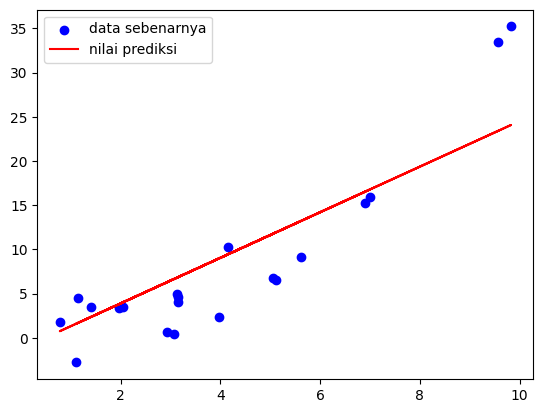

In [53]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error #semakin kecil (mendekati 0) MSE, semakin bagus

Lasso_model = Lasso(alpha=0.1) #Lambda = alpha untuk mengukur seberapa besar penaltinya
#training
Lasso_model.fit(x_train,y_train)

#testing
y_pred = Lasso_model.predict(x_test)
mse = mean_squared_error(y_pred,y_test) #hasil prediksi dan data asli
print(f"hasil MSE = {mse}")

plt.scatter(x_test, y_test, color='blue', label='data sebenarnya')
plt.plot(x_test, y_pred, color='red', label='nilai prediksi')
plt.legend()
plt.show()

# Polynomial Regression

Defenisi : ekstensi dan linear regression yang memperkenalkan derajat polynomial ke dalam persamaan untuk membuat hubungan non-linear

$$
  \hat{y} = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 \dots + \beta_n X^n
$$

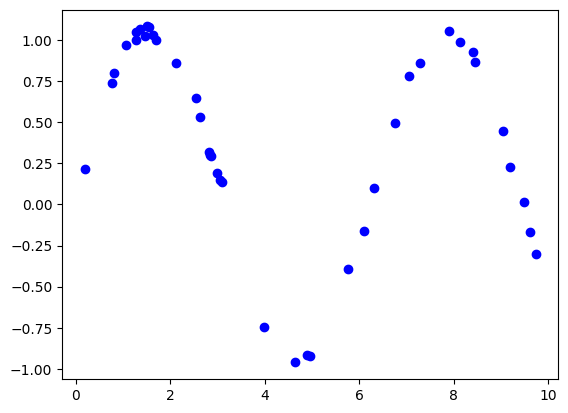

In [54]:
from sklearn.preprocessing import PolynomialFeatures

#generete synthetic data
x = np.sort(np.random.rand(40) * 10).reshape(-1,1)
y = np.sin(x).ravel() + np.random.rand(40) * 0.1

plt.scatter(x,y, color = 'blue')

Text(0.5, 1.0, 'Overfitting \n MSE = 0.037027200191596686')

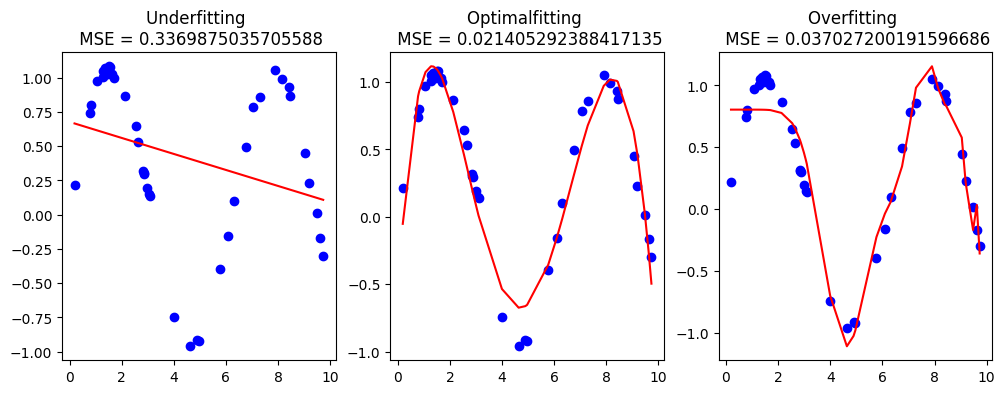

In [55]:
from sklearn.pipeline import make_pipeline
plt.figure(figsize=(12,4))

#Under-Fitting (Linear Regression)
plt.subplot(1,3,1) #Baris 1 kolom 3, urutan 1"
Linear_model = LinearRegression()
Linear_model.fit(x,y)
y_pred = Linear_model.predict(x)
mse = mean_squared_error(y,y_pred) #MSE TRAINING
plt.scatter(x, y, color='blue')
plt.plot(x, y_pred, color='red')
plt.title(f'Underfitting \n MSE = {mse}')

#Optimal-fitting / Good Generalization (Polynomial Regression derajat = 5)
plt.subplot(1,3,2) #Baris 1 kolom 3, urutan 2
optimal_model = make_pipeline(PolynomialFeatures(degree=5), LinearRegression())
optimal_model.fit(x,y)
y_pred = optimal_model.predict(x)
mse = mean_squared_error(y,y_pred)  #MSE TRAINING
plt.scatter(x, y, color='blue')
plt.plot(x, y_pred, color='red')
plt.title(f'Optimalfitting \n MSE = {mse}')

#Optimal-fitting / Good Generalization (Polynomial Regression derajat = 20)
plt.subplot(1,3,3) #Baris 1 kolom 3, urutan 3
overfit_model = make_pipeline(PolynomialFeatures(degree=20), LinearRegression())
overfit_model.fit(x,y)
y_pred = overfit_model.predict(x)
mse = mean_squared_error(y,y_pred)  #MSE TRAINING
plt.scatter(x, y, color='blue')
plt.plot(x, y_pred, color='red')
plt.title(f'Overfitting \n MSE = {mse}')
